# 分析「好勁稻工作室（搶救嘉禾新村）」臉專PO文資訊
## 目的
* 分析其所關注的面向、及行動面向
* 了解該組織再行動時所接觸到的單位
* 了解臉書粉專'搶救' 的意思為何

## 觀察
* 根據文字雲可以觀察到該粉專關注的面向為文化，文資的保存，也就是嘉禾新村的保存運動
* 文字雲當中有出現柯文哲、台北等字眼，所以台北市府可能為該團體在進行運動時，所需要常接觸的政府單位
* 臉書粉專名稱'搶救'的意思，可能為捍衛該村落的拆除，而不是該村落被以不當方式運用


In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import json

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
import requests
from bs4 import BeautifulSoup
import facebook
from collections import Counter
from PIL import Image

In [3]:
#透過套件facebook 抓取facebook 粉專ID資訊

token = 'EAACEdEose0cBAOOVe2Ql21LEAlj1WotyXkhuUlsUEUpZBZB9SNGaLmyTZCZClWlcVZBA6vk7yxIBUqFOm38fpch4tHXYrxRWMsrEWGwE36sIxYT7TReiwwKMHAOIihWEqcgYzZA56AswiW7ifBinR5xxhQlZCUT5UlRIDUuJ8DVQqKZAbjVZBkGQUnh8OvpN69iTP4pECWzn5GgZDZD'

graph = facebook.GraphAPI(access_token = token) 
fanpage_info = graph.get_object('JiaHeStudio', field = 'id')  

#print(fanpage_info)  
#print("Fanpage id = ", fanpage_info['id'])

In [4]:
#抓取facebook 粉專PO文資訊
posts = graph.get_connections(id = '290813577773327', connection_name = 'posts', summary = True)


In [5]:
j=json.dumps(posts, ensure_ascii=False) #dict to int
jsondata = json.loads(j)  # int to dict


In [6]:

for i in range(5):
    posts=[]
    
    #抓取每一篇POST資訊
    #有些PO文屬於分享文無法用jsondata['data'][x]["message"]抓取，故使用try 除錯
    for x in range(len(jsondata['data'])):    
        try :
            posts.append( jsondata['data'][x]["message"] )  #下一頁
        except:
            None
    
    #將抓取到的POST資訊藉由pandas套件存成文字檔
    df = pd.DataFrame.from_dict(posts)
    filename = str(i)+".txt"
    df.to_csv(filename, sep=',', index=False)    
    
    nextsite = jsondata['paging']['next']  #找出下一頁POST資訊的網址
    response = requests.get(nextsite)      
    jsondata = json.loads(response.text) 


In [7]:
#讀取先前存下來的POST檔案，並存成list
posts = []
for i in range(5):
    filename = str(i)+".txt"
    f = open(filename, 'r')
    x = f.readlines()
    posts.append(x)
    
flat_list = []
flat_list = [item for sublist in posts for item in sublist]   #list of list to list

In [8]:
demo_text = ''.join(flat_list)  #convert to str

In [9]:
jieba.add_word('柯文哲')  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\chenhur\AppData\Local\Temp\jieba.cache
Loading model cost 1.309 seconds.
Prefix dict has been built succesfully.


In [10]:
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也', '於']
puncs = '\/！？｡＂＃＄％＆＇，（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

seg_list = jieba.cut(demo_text, cut_all=False)  # 斷詞斷句
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: 0/ 
/ "/ 嘉禾/ 新村/ 並非頭/ 人/ 政治/ 下/ 的/ 唯一/ 受害者/ 。/ 
/ 從/ 南港/ 瓶蓋/ 工廠/  / Nangang/  / Bottle/  / Cap/  / Factory/ 、/ 回家吧/ ！/ 新/ 北投/ 火車/ 站/ 、/ 嘉禾/ 新村/ ，/ 到/ 台北市/ 三橋/ 町/ 紅葉園/ 陳/ 茂/ 通宅/ ，/ 有太多/ 太多/ 的/ 文化/ 資產/ ，/ 在/ 柯文哲/ 市政/ 團隊/ 為/ 了/ 固樁/ 討好/ 地方/ 頭人/ 的/ 短視/ 近利/ 下/ ，/ 而/ 被/ 拆除/ 、/ 被/ 遷移/ 、/ 被/ 消失/ ！/ "/ 
/ "/ （/ Quote/ ）/ 
/ 
/ 柯文哲/ 接著/ 提到/ ，/ 「/ 城南/ 有意思/ 」/ 不是/ 只有/ 這些/ ，/ 其實/ 這個/ 地區/ ，/ 從/ 他/ 昨天/ 才/ 去/ 繞/ 了/ 一圈/ 的/ 紀州/ 庵/ 、/ 客家/ 文化/ 園區/ 、/ 寶藏/ 巖/ 、/ 臺/ 北影/ 視音/ 學校/ 還有/ 煥民/ 新村/ ，/ 其實/ 還有/ 很多/ 好玩/ 的/ 地方/ ，/ 所以/ 四月/ 一日/ 到/ 四月八/ 日/ ，/ 請/ 大家/ 都/ 來/ 「/ 城南/ 有意思/ 」/ ，/ 有/ 各種/ 活動/ ，/ 包括/ 戲劇/ 、/ 電影/ ，/ 很多/ 就/ 對/ 了/ 。/ 
/ -/ -/ 
/ 可是/ 柯文哲/ ，/ 包含/ 嘉禾/ 新村/ 在/ 內/ ，/ 城南/ 許多/ 好玩/ 而/ 有意思/ 的/ 地方/ ，/ 正因/ 為/ 你/ 與/ 你/ 的/ 「/ 失政/ 」/ 團隊/ 而/ 快速/ 毀滅/ ！/ 
/ 
/ 延伸/ 閱讀/ ：/ 失根/ 而/ 無心/ 的/ 城市/ 博物/ 館/ 
/ https/ :/ // // tw/ ./ news/ ./ appledaily/ ./ com/ // forum/ // realtime/ // 20180402/ // 1327464/ // "/ 
/ "/ [/ 守護/ 台北/ 舊城/ 的/ 珍貴/ 文化/ 資產/ ，/ 需要/ 認/ 真的/ 代議士/ 為/ 歷史/ 喉舌/ ！/ ]/ 
/ 
/ 文化/ 資產/ 的/ 保存/ ，/ 對/ 於/ 一座/ 城市

In [11]:

seg_list = list(seg_list)

#濾除停用字及標點符號
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1

# TF_counter = Counter(seg_list) 另一種計算 詞頻的方式

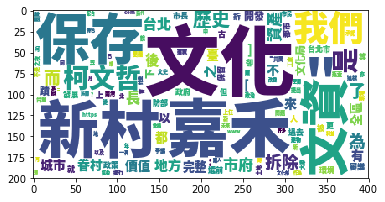

In [17]:
font = r"D:/dsc-crawling-master/Session_B/data/NotoSansCJKtc-Black.otf"
wordcloud = WordCloud(font_path=font,
                     background_color="white", # 設定背景顏色
                      max_font_size=90,        # 最大字的字體大小
                     )
wordcloud.fit_words(wordDict) 
plt.imshow(wordcloud)

## 分析結果

從文字雲當中了解到該粉專關關注的面向為文資與文化的保存

且該團體在抗爭的事情可能為政府的拆除行動

且其所在地可能為台北市，因為有多次提到'台北'及'柯文哲'

# ----------TF-IDF-------------

In [65]:

doc = []
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也', '於','時','之','號']
puncs = '\/！？｡＂＃＄％＆＇[ ,，()（）#%\n＊＋，《－／?/ ：&_=-；＜＝ ]＞＠［＼］＾「！＿.｀｛。｜" :｝～」｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。0 1 2 3 4 5 6 7 8 9 zxcvbnmasdfghjklqwertyuiopZXCVBNMASDFGHJKLQWERTYUIOP'
puncs = [x for x in puncs]

jieba.add_word('黃國昌') 
jieba.add_word('性別教育')
jieba.add_word('同性別二人')  
jieba.add_word('同性二人')  
jieba.add_word('永久共同生活')
jieba.add_word('安定力量')
jieba.add_word('言詞辯論')

#讀取先前存下來的POST檔案
for i in range(12):
    posts = []
    filename = str(i)+".txt"
    f = open(filename, 'r')
    x = f.readlines()
    posts.append(x)
    
    
    flat_list = [item for sublist in posts for item in sublist]  # List of List to list 
    demo_text = ''.join(flat_list) # 將 list of string 轉變成一個大字串
    
    
    #濾除英文、標點符號、數字
    textx = ''
    for i in demo_text:
        if i not in puncs:
            textx = textx + i 
 
    doc.append(textx)
    doc = [" ".join(jieba.cut(article)) for article in doc ] #斷詞斷句
    



In [66]:
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(doc)

In [68]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  2097


In [69]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (12, 2097)


<12x2097 sparse matrix of type '<class 'numpy.float64'>'
	with 3276 stored elements in Compressed Sparse Row format>

In [70]:
# check each document

title = ['公投起跑 呼籲全民用公投捍衛婚姻家庭及兒少教育','幸福盟推不改婚姻定義專法公投 保障同性關係並非支持同婚','婚姻家庭 全民決定 另立專法 保障權益〉公投提案記者會','下一代幸福聯盟公投提案 邀請安定力量共創台灣新局','請黃國昌在改變婚姻定義前 先改革他自己','性平教育教什麼？幸福盟回應2017年同志大遊行主題','針對台大校園情殺案 呼籲教育部重視全人性教育和生命教育','因北市民政局政令宣導 不少國中小網站登載兒少不宜活動之資訊','同性婚姻登記於法無據 法院不應越權創設新興法律關係','下一代幸福聯盟發動公投記者會會後新聞稿 同性婚姻應交付公投','大法官同性婚姻釋憲案記者會聲明稿','【新聞稿】幸福盟：同性婚姻釋憲言詞辯論只有同運的聲音']
for i in range(len(doc)):
    #print('----Document {0}----'.format(i))
    print('-------------------------'+title[i])
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.2:
              print(words[j], tfidf[i,j], i ,j)

-------------------------公投起跑 呼籲全民用公投捍衛婚姻家庭及兒少教育
公投 0.326867182466 0 333
婚姻 0.269635245406 0 649
性別 0.239692720783 0 875
教育 0.285902991215 0 1090
-------------------------幸福盟推不改婚姻定義專法公投 保障同性關係並非支持同婚
保障 0.317105823452 1 251
公投 0.249387684493 1 333
同性別二人 0.273576744875 1 507
專法 0.365753528237 1 763
改變 0.20782307041 1 1068
永久共同生活 0.243835685491 1 1301
號解釋 0.243835685491 1 1713
-------------------------婚姻家庭 全民決定 另立專法 保障權益〉公投提案記者會
保障 0.295651324234 2 251
同性 0.224954425373 2 505
同性別二人 0.218224247444 2 507
婚姻 0.24863383857 2 649
專法 0.331535225425 2 763
-------------------------下一代幸福聯盟公投提案 邀請安定力量共創台灣新局
公投 0.563447735797 3 333
婚姻 0.228469361879 3 649
安定力量 0.271588854216 3 684
定義 0.208000159679 3 692
幸福 0.2048281442 3 820
-------------------------請黃國昌在改變婚姻定義前 先改革他自己
罷免 0.40277643175 4 1618
黃國昌 0.561183183474 4 2092
-------------------------性平教育教什麼？幸福盟回應2017年同志大遊行主題
孩子 0.263459392634 5 664
性平 0.357897694091 5 876
教育 0.518239531638 5 1090
-------------------------針對台大校園情殺案 呼籲教育部重視全人性教育和生命教育
健康 0.2